In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

### Import Data for both Models

In [2]:
## Import Boston and standardize
np.random.seed(123)
boston = datasets.load_boston()
X_boston = boston['data']
X_boston = (X_boston - X_boston.mean(0))/(X_boston.std(0))
y_boston = boston['target']

## Train-test split
np.random.seed(123)
test_frac = 0.25
test_size = int(len(y_boston)*test_frac)
test_idxs = np.random.choice(np.arange(len(y_boston)), test_size, replace = False)
X_boston_train = np.delete(X_boston, test_idxs, 0)
y_boston_train = np.delete(y_boston, test_idxs, 0)
X_boston_test = X_boston[test_idxs]
y_boston_test = y_boston[test_idxs]

## Import cancer and standardize
np.random.seed(123)
cancer = datasets.load_breast_cancer()
X_cancer = cancer['data']
X_cancer = (X_cancer - X_cancer.mean(0))/(X_cancer.std(0))
y_cancer = 1*(cancer['target'] == 1)

## Train-test split
np.random.seed(123)
test_frac = 0.25
test_size = int(len(y_cancer)*test_frac)
test_idxs = np.random.choice(np.arange(len(y_cancer)), test_size, replace = False)
X_cancer_train = np.delete(X_cancer, test_idxs, 0)
y_cancer_train = np.delete(y_cancer, test_idxs, 0)
X_cancer_test = X_cancer[test_idxs]
y_cancer_test = y_cancer[test_idxs]

c:\Users\Kevin's PC\Documents\Python Projects\DS-from-Scratch\NeuralNetworks\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alte

# FeedForwardNeuralNetwork Regression

In [3]:
# import package
from MyNN import FeedForwardNeuralNetwork

In [4]:
ffnn = FeedForwardNeuralNetwork()
ffnn.fit(X_boston_train, y_boston_train, n_hidden = 8)
y_boston_test_hat = ffnn.predict(X_boston_test)

c:\Users\Kevin's PC\Documents\Python Projects\DS-from-Scratch\NeuralNetworks\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


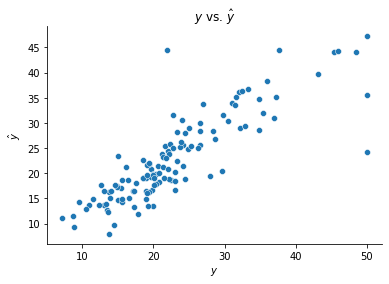

In [5]:
# plot results
fig, ax = plt.subplots()
sns.scatterplot(y_boston_test, y_boston_test_hat[0])
ax.set(xlabel = r'$y$', ylabel = r'$\hat{y}$', title = r'$y$ vs. $\hat{y}$')
sns.despine()
plt.show()

# FeedForwardNeuralNetwork Classification

In [6]:
ffnn = FeedForwardNeuralNetwork()
# different attributes for classification
# specifically loss and f2
ffnn.fit(X_cancer_train, y_cancer_train, n_hidden = 8,
         loss = 'log', f2 = 'sigmoid', seed = 123, lr = 1e-4)
y_cancer_test_hat = ffnn.predict(X_cancer_test)
# measure the accuracy
np.mean(y_cancer_test_hat.round() == y_cancer_test)

0.9929577464788732

# Matrix Approach: FeedForwardNeuralNetwork - Regression

In [7]:
from MyNN import FeedForwardMatrix

In [8]:
ffnn = FeedForwardMatrix()
ffnn.fit(X_boston_train, y_boston_train, n_hidden = 8)
y_boston_test_hat = ffnn.predict(X_boston_test)

c:\Users\Kevin's PC\Documents\Python Projects\DS-from-Scratch\NeuralNetworks\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


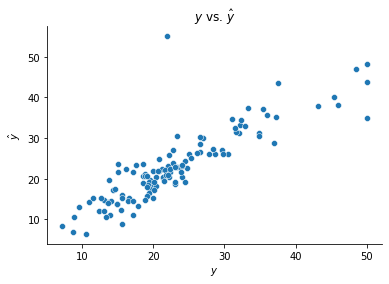

In [9]:
fig, ax = plt.subplots()
sns.scatterplot(y_boston_test, y_boston_test_hat[0])
ax.set(xlabel = r'$y$', ylabel = r'$\hat{y}$', title = r'$y$ vs. $\hat{y}$')
sns.despine()
plt.show()

# Matrix Approach: FeedForwardNeuralNetwork - Classification

In [10]:
ffnn = FeedForwardMatrix()
ffnn.fit(X_cancer_train, y_cancer_train, n_hidden = 8,
         loss = 'log', f2 = 'sigmoid', seed = 123, lr = 1e-4)
y_cancer_test_hat = ffnn.predict(X_cancer_test)
# find accuracy of NN
np.mean(y_cancer_test_hat.round() == y_cancer_test)

0.9929577464788732

# Implementation Using Tensorflow

In [11]:
import tensorflow as tf
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
boston = datasets.load_boston()
X_boston = boston['data']
y_boston = boston['target']

c:\Users\Kevin's PC\Documents\Python Projects\DS-from-Scratch\NeuralNetworks\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alte

### With Sequential API

In [13]:
# instatiate the model
model = tf.keras.models.Sequential(name = 'Sequential_model')

# add layers
model.add(tf.keras.layers.Dense(units = 8,
                                activation = 'relu',
                                input_shape = (X_boston.shape[1], ),
                                name = 'hidden'))

model.add(tf.keras.layers.Dense(units = 1,
                                activation = 'linear',
                                name = 'output'))

# compile
model.compile(optimizer = 'adam', loss = 'mse')
print(model.summary())

# fit the model
model.fit(X_boston, y_boston, epochs = 100, batch_size = 1, validation_split = 0.2, verbose = 0)

Model: "Sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 8)                 112       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
# Create Predictions
yhat_boston = model.predict(X_boston)[:,0]

c:\Users\Kevin's PC\Documents\Python Projects\DS-from-Scratch\NeuralNetworks\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


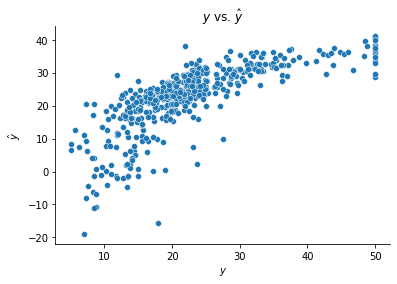

In [15]:
# Plot
fig, ax = plt.subplots()
sns.scatterplot(y_boston, yhat_boston)
ax.set(xlabel = r"$y$", ylabel = r"$\hat{y}$", title = r"$y$ vs. $\hat{y}$")
sns.despine()
plt.show()

### With Functional API

In [18]:
# define model
inputs = tf.keras.Input(shape = (X_boston.shape[1], ), name = 'input')
hidden = tf.keras.layers.Dense(8, activation = 'relu', name = 'first_hidden')(inputs)
outputs = tf.keras.layers.Dense(1, activation = 'linear', name = 'output')(hidden)

# define the model
model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'Functional_Model')

# compile the model
model.compile(optimizer = 'adam', loss = 'mse')
print(model.summary())

# fit the model
model.fit(X_boston, y_boston, epochs = 100, batch_size = 1, validation_split = 0.2, verbose = 0)

Model: "Functional_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 13)]              0         
                                                                 
 first_hidden (Dense)        (None, 8)                 112       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
# save the predictions
yhat_boston = model.predict(X_boston)[:, 0]

c:\Users\Kevin's PC\Documents\Python Projects\DS-from-Scratch\NeuralNetworks\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


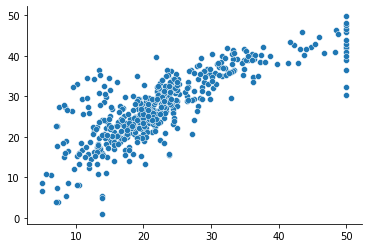

In [21]:
# plot the predictions against the actual values
fig, axs = plt.subplots()
sns.scatterplot(y_boston, yhat_boston)
ax.set(xlabel = r'$y$', ylabel = r'$\hat{y}$', title = r'$y$ vs. $\hat{y}$')
sns.despine()
plt.show()